In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
print(data.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
features = ['mean smoothness', 'mean compactness','mean concavity', 'mean concave points',
'mean symmetry']

In [ ]:
df['added_features'] = df[features].sum(axis=1)
df['prod_features'] = df[features].prod(axis=1)
df['mean_features'] = df[features].mean(axis=1)
df['std_features'] = df[features].std(axis=1)

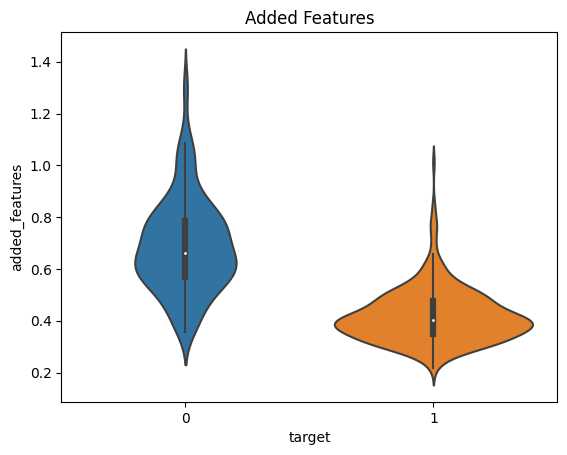

In [ ]:
df['max_features'] = df[features].max(axis=1)
df['min_features'] = df[features].min(axis=1)
df['min_features'] = df[features].min(axis=1)

sns.violinplot(x="target", y="added_features", data=df)
plt.title('Added Features')
plt.show()

In [ ]:
df['difference'] = df['worst compactness'].sub(df['mean compactness'])
df['quotient'] = df['worst radius'].div(df['mean radius'])
features = ['mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points',
'mean symmetry']
worst_f = ['worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points',
'worst symmetry']
df['worst'] = df[worst_f].sum(axis=1)
df[features] = df[features].div(df['worst'], axis=0)
df[features] = df[features].div(df['worst'], axis=0)

In [ ]:
df_cov = pd.read_csv('sars-cov-2-variants-dmsc_220965.csv')
df_cov = df_cov.dropna(subset = ['Date_Start', 'Date_End'])

In [ ]:
df_cov['B.1.1.529 (Omicron)'] = df_cov['B.1.1.529 (Omicron']
df_cov = df_cov.drop(columns=['B.1.1.529 (Omicron','Unnamed: 6', 'Unnamed: 7'],axis = 1)

In [ ]:
df_cov.head()

,Date_Start,Date_End,B.1.1.7 (Alpha),B.1617.2 (Delta),B.1.351 (Beta),B.1.1.529 (Omicron)
0,1/4/2021,20/6/2021,5641.0,661.0,38.0,0.0
1,21/6/2021,27/6/2021,2218.0,459.0,89.0,0.0
2,28/6/2021,2/7/2021,1458.0,721.0,59.0,0.0
3,3/7/2021,9/7/2021,2058.0,1834.0,85.0,0.0
4,10/7/2021,16/7/2021,1139.0,2090.0,111.0,0.0


In [ ]:
features_cov = ['B.1.1.7 (Alpha)', 'B.1617.2 (Delta)', 'B.1.351 (Beta)', 'B.1.1.529 (Omicron)']

In [ ]:
df_cov['#people'] = df_cov[features_cov].sum(axis=1)
# sum total of type of CoV

In [ ]:
df_cov['%Alpha'] = df_cov['B.1.1.7 (Alpha)'].div(df_cov['#people'], axis=0)
# find percentage of Alpha in each range days

In [ ]:
df_cov['mean_features'] = df_cov[features_cov].mean(axis=1)
df_cov['std_features'] = df_cov[features_cov].std(axis=1)
#find mean and std of each type

In [ ]:
df_cov.head()

,Date_Start,Date_End,B.1.1.7 (Alpha),B.1617.2 (Delta),B.1.351 (Beta),B.1.1.529 (Omicron),#people,%Alpha,mean_features,std_features
0,1/4/2021,20/6/2021,5641.0,661.0,38.0,0.0,6340.0,0.889748,1585.00,2720.927905
1,21/6/2021,27/6/2021,2218.0,459.0,89.0,0.0,2766.0,0.801880,691.50,1036.892312
2,28/6/2021,2/7/2021,1458.0,721.0,59.0,0.0,2238.0,0.651475,559.50,682.379415
3,3/7/2021,9/7/2021,2058.0,1834.0,85.0,0.0,3977.0,0.517475,994.25,1103.330224
4,10/7/2021,16/7/2021,1139.0,2090.0,111.0,0.0,3340.0,0.341018,835.00,981.298799
